In [1]:
import pandas as pd

#### Tomamos como base la estimación de proporción de una variable para determinar el tamaño de la muestra de nuestra Gran DB puesto que podemos ver a la elección de un registro de la DB original como una variable aleatoria Bernoulli donde el éxito corresponde a incluir el registro dentro de la muestra y el fracaso en el otro caso.

#### Con base en lo anterior consideramos una confianza del 95% y un error de 2% para cada variable, por lo que requerimos de muestrear 9,604 registros[1](https://en.wikipedia.org/wiki/Sample_size_determination). Si suponemos independencia entre nuestras variables basta con incluir en la muestra 9,604 $\times$ 11 = 105,644 registros. 

#### El tamaño de muestra anterior es adecuado ya que al suponer independencia entre las variables se sobreestima el número de registros necesarios en comparación del cálculo del mismo sin ese supuesto el cual es complicado y requiere de otros métodos de estimación de densidades. 


In [2]:
data = pd.read_csv('sample_size_speedup_105644checkouts-by-title.csv', encoding='latin-1')

In [3]:
data.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2006,6,2,Terrific totes carryalls 40 bags to sew for sh...,NaN,"Sewing, Tote bags",NaN,NaN
1,Physical,Horizon,SOUNDDISC,2006,6,5,Bob Wills and his Texas Playboys anthology 193...,NaN,"Country music, Western swing Music",NaN,NaN
2,Physical,Horizon,SOUNDDISC,2006,6,3,Images of Africa,NaN,"Music South Africa, Folk music South Africa, P...",NaN,NaN
3,Physical,Horizon,BOOK,2006,6,1,Mr. Nick's knitting / written by Margaret Wild...,"Wild, Margaret, 1948-","Knitting Juvenile fiction, Friendship Fiction","Harcourt Brace Jovanovich,","1989, c1988."
4,Physical,Horizon,BOOK,2006,6,1,king of nothing a Fiddler novel,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutYear        int64
CheckoutMonth       int64
Checkouts           int64
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtype: object

# Descripción de las variables 
El conjunto de datos contiene las variables que se enlistan a continuación junto con su descripción:
<ul>
    <li> <code>UsageClass</code>: Indica si el artículo es físico o digital (Physical, Digital) </li>
    <li>    <code>CheckoutType</code>: Indica la herramienta del proveedor que se utiliza para retirar el artículo (Horizon, OverDrive, Freegal, Hoopla, Zinio).    </li>
     <li>    <code>MaterialType</code>: Describe el tipo de artículo prestado ( e.g. BOOK, EBOOK, SOUNDDISC, VIDEODISC) cuenta con 66 categorías.       </li>
     <li>    <code>CheckoutYear</code>: El año de retiro de 4 dígitos para este registro, de 2005 a 2019.   </li>
     <li>    <code>CheckoutMonth</code>: El mes de retiro para este registro, (1-enero, 2-febrero, ..., 12-diciembre).   </li>
     <li>    <code>Checkouts</code>: Un recuento de la cantidad de veces que se extrajo el título dentro del <code>CheckoutMonth</code>.    </li>
     <li>    <code>Title</code>: El título completo y el subtítulo de un artículo individual.   </li>
     <li>    <code>Creator</code>: El autor o entidad responsable de la creación del artículo.   </li>
     <li>    <code>Subjects</code>: El tema del artículo tal como aparece en el catálogo.   </li>
     <li>    <code>Publisher</code>: El editor del título.   </li>
     <li>    <code>PublicationYear</code>: El año del registro del catálogo en el que se publicó, imprimió o registró el derecho de autor del artículo.   </li>
</ul>

# Posibles relaciones entre las variables


Con la creciente penetración de los medios digitale ses de esperar que los libros impresos (físicos) tiendan a decrecer en popularidad conforme avance el tiempo revisaremos eso con la correlación de la variable <code>UsageClass</code> y <code>CheckoutYear</code>.


In [5]:
temp = data[['UsageClass', 'CheckoutYear', 'Checkouts']]
temp = data.groupby(['UsageClass', 'CheckoutYear']).sum().reset_index()
from plotnine import *
''' config notebook ''' 
%matplotlib inline

In [6]:
temp

,UsageClass,CheckoutYear,CheckoutMonth,Checkouts
0,Digital,2005,128,12
1,Digital,2006,288,57
2,Digital,2007,599,105
3,Digital,2008,1113,193
4,Digital,2009,1252,268
5,Digital,2010,3047,587
6,Digital,2011,7934,1822
7,Digital,2012,8751,2486
8,Digital,2013,11671,4006
9,Digital,2014,16395,5495


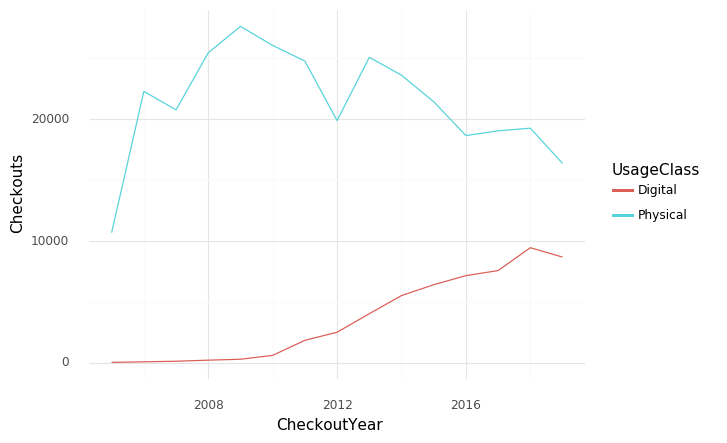

<ggplot: (-9223371893200877520)>

In [7]:
ggplot(temp, aes(x ='CheckoutYear', y = 'Checkouts', color='UsageClass' )) + \
               geom_line()  + theme_minimal()

Efectivamente el número de reservas de libros físicos a disminuido desde el 2005.
Inspeccionamos el autor más popular en cada uno de los 2 tipos de artículos.

In [8]:
temp = data[['UsageClass', 'Creator', 'Checkouts']]
temp1 = temp[temp['UsageClass'] == 'Digital' ]
temp1 = temp1.groupby(['UsageClass', 'Creator']).sum().reset_index()
temp1 = temp1.sort_values(['Checkouts'],ascending=False).reset_index()
temp1

,index,UsageClass,Creator,Checkouts
0,5232,Digital,John Grisham,435
1,6334,Digital,Lee Child,343
2,4513,Digital,James Patterson,336
3,4321,Digital,J. K. Rowling,263
4,3715,Digital,George R. R. Martin,237
...,...,...,...,...
11276,4943,Digital,Jessica Andersen,1
11277,4940,Digital,Jessi Colter,1
11278,4939,Digital,Jesse Ventura,1
11279,4936,Digital,Jesse J. Thoma,1


In [9]:
temp = data[['UsageClass', 'Creator', 'Checkouts']]
temp1 = temp[temp['UsageClass'] == 'Physical' ]
temp1 = temp1.groupby(['UsageClass', 'Creator']).sum().reset_index()
temp1 = temp1.sort_values(['Checkouts'],ascending=False).reset_index()
temp1

,index,UsageClass,Creator,Checkouts
0,22695,Physical,"Seuss, Dr.",1229
1,16908,Physical,"Meadows, Daisy",870
2,5870,Physical,"Davis, Jim, 1945 July 28-",799
3,19087,Physical,"Osborne, Mary Pope",677
4,19663,Physical,"Perelman, Deb",635
...,...,...,...,...
28014,13246,Physical,"Kenney, Karen Latchana",1
28015,13248,Physical,Kenny Barron Quintet,1
28016,13250,Physical,"Kenny, Lorraine Delia, 1961-",1
28017,13255,Physical,"Kent, Charles Foster, 1867-1925",1



Los autores más populares son: [Dr. Seuss](https://en.wikipedia.org/wiki/Dr._Seuss) para la categoría de fisico y [John Grisham](https://en.wikipedia.org/wiki/John_Grisham) para la categoría de digital  


Veamos el desarrollo longitudinal de los tipos de material desde el 2005 al 2019 


     index   MaterialType  CheckoutYear  CheckoutMonth  Checkouts
0       30           BOOK          2013          27679      14403
1       28           BOOK          2011          29344      13350
2       31           BOOK          2014          26885      13087
3       35           BOOK          2018          22392      12947
4       27           BOOK          2010          27263      12859
..     ...            ...           ...            ...        ...
279    253      VIDEOCASS          2012             12          1
280    270       VIDEOREC          2015              7          1
281    119      MICROFORM          2007              7          1
282    118            MAP          2019              9          1
283     81  ER, SOUNDDISC          2008             12          1

[284 rows x 5 columns]


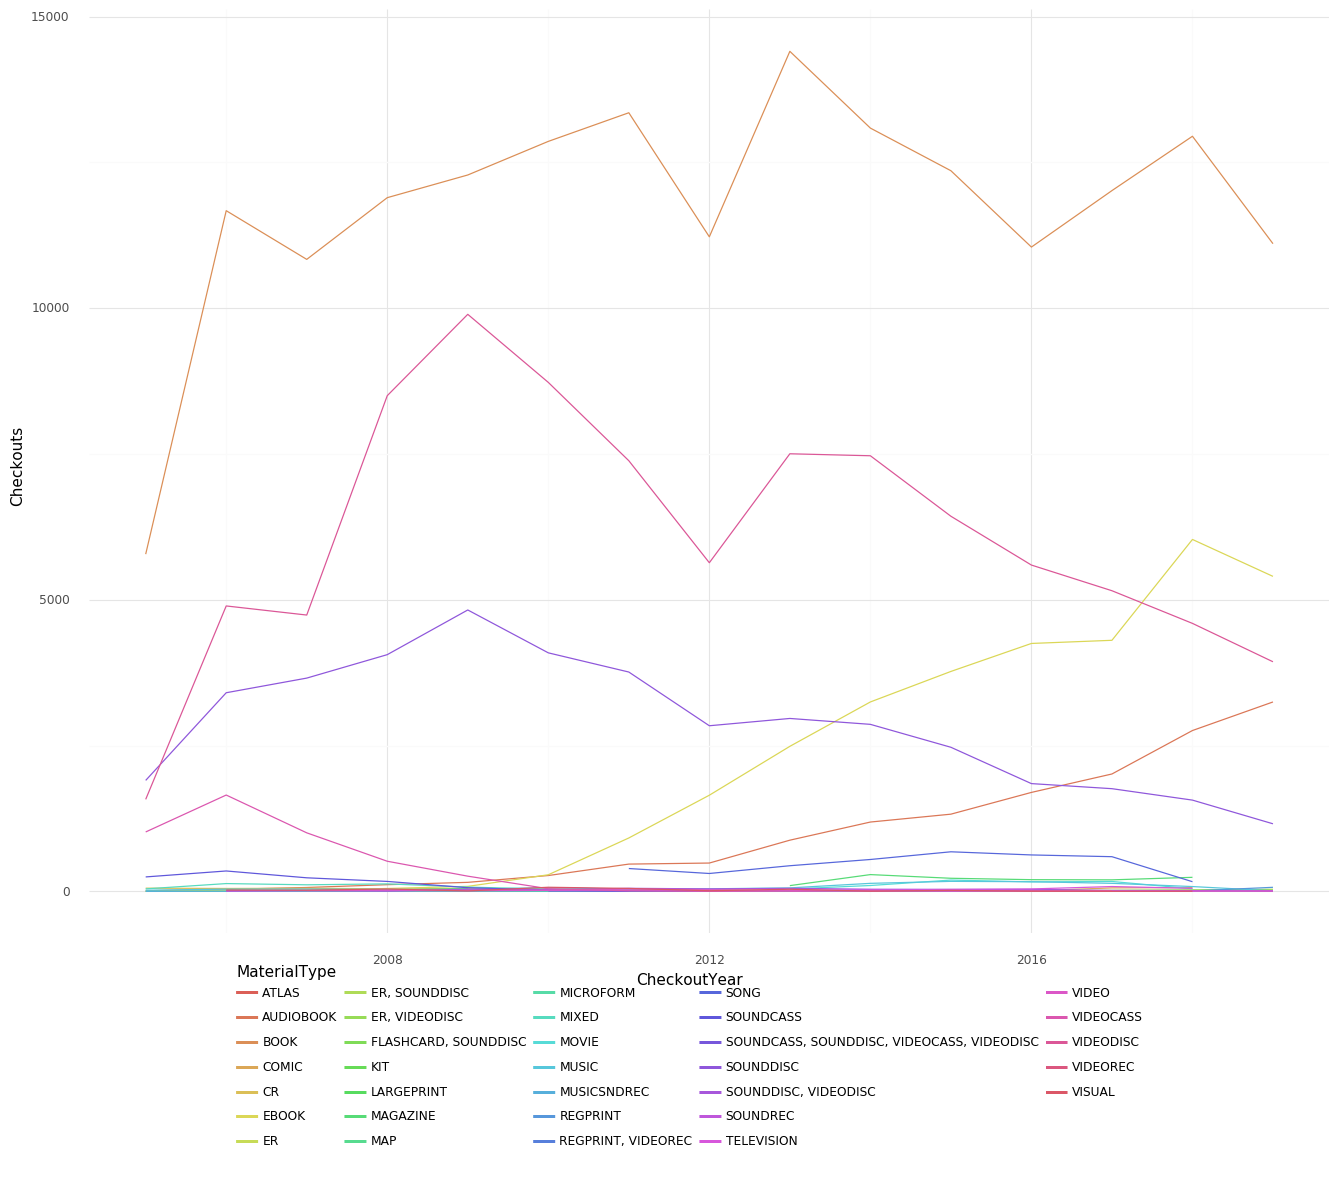

<ggplot: (-9223371893200336908)>

In [10]:
temp = data[['MaterialType', 'CheckoutYear', 'Checkouts']]
temp = data.groupby(['MaterialType', 'CheckoutYear']).sum().reset_index()
temp = temp.sort_values(['Checkouts'],ascending=False).reset_index()
print(temp)
ggplot(temp, aes(x ='CheckoutYear', y = 'Checkouts', color='MaterialType' )) + \
               geom_line()  + theme_minimal() +theme( legend_position='bottom', figure_size=(16, 12))

Donde vemos que el tipo de material BOOK en promedio es el más popular pero el EBOOK ha ganado popularidad recientemente

# ¿Creación de nuevas variables?

Una variable de posible interés que podemos crear es la longitud del título de la obra 


In [11]:
data['Tittle_len'] = data.Title.str.len()
data

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,Tittle_len
0,Physical,Horizon,BOOK,2006,6,2,Terrific totes carryalls 40 bags to sew for sh...,NaN,"Sewing, Tote bags",NaN,NaN,83
1,Physical,Horizon,SOUNDDISC,2006,6,5,Bob Wills and his Texas Playboys anthology 193...,NaN,"Country music, Western swing Music",NaN,NaN,52
2,Physical,Horizon,SOUNDDISC,2006,6,3,Images of Africa,NaN,"Music South Africa, Folk music South Africa, P...",NaN,NaN,16
3,Physical,Horizon,BOOK,2006,6,1,Mr. Nick's knitting / written by Margaret Wild...,"Wild, Margaret, 1948-","Knitting Juvenile fiction, Friendship Fiction","Harcourt Brace Jovanovich,","1989, c1988.",75
4,Physical,Horizon,BOOK,2006,6,1,king of nothing a Fiddler novel,NaN,NaN,NaN,NaN,31
...,...,...,...,...,...,...,...,...,...,...,...,...
105639,Physical,Horizon,BOOK,2014,8,10,Ramona the brave / Beverly Cleary ; illustrate...,"Cleary, Beverly",Quimby Ramona Fictitious character Juvenile fi...,"HarperCollins,",2006.,65
105640,Digital,OverDrive,EBOOK,2014,8,1,Idiot America: How Stupidity Became a Virtue i...,Charles Pierce,"Nonfiction, Sociology","Random House, Inc.",2009,68
105641,Physical,Horizon,BOOK,2014,8,1,"Grant takes command, With maps by Samuel H. Br...","Catton, Bruce, 1899-1978","Grant Ulysses S Ulysses Simpson 1822 1885, Uni...","Little, Brown",[1969],51
105642,Digital,OverDrive,AUDIOBOOK,2014,8,1,My Brave Year of Firsts (Unabridged),Jamie Lee Curtis,"Juvenile Fiction, Juvenile Literature",HarperCollins Publishers Inc.,2014,36


# ¿Qué valor agregado podríamos obtener de la base de datos?
El valor agregado que podemos obtener del conjunto de datos es amplio. Por un lado podemos obtener pronósticos a nivel desde el nivel tipo de material hasta título para optimizar el stock de la biblioteca en función de la demanda a través del tiempo. 

También podemos mejorar la logística de la biblioteca identificando los ítems con mayor demanda y disponiéndose de manera más accesible para su despacho más rápido y a la par identificar los ítems con menor demanda y reubicarlos. 
Finalmente el contenido de la biblioteca en cuanto a tema y autores puede prepararse por adelantado identificando los temas y autores que han sido tendencia reciente e investigando sus nuevas obras. Información que puede monetizarse por ejemplo para cafeterías o pequeñas librerías que quieran invertir en libros o material para aumentar su repertorio de servicios al cliente. 


# Aplicar algoritmos sencillos de ML
El primer task que sobresale es el de predecir el número de veces que un artículo se reserva mensualmente, para ello utilizaremos una regresión lineal.

In [12]:
data.head()


,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,Tittle_len
0,Physical,Horizon,BOOK,2006,6,2,Terrific totes carryalls 40 bags to sew for sh...,NaN,"Sewing, Tote bags",NaN,NaN,83
1,Physical,Horizon,SOUNDDISC,2006,6,5,Bob Wills and his Texas Playboys anthology 193...,NaN,"Country music, Western swing Music",NaN,NaN,52
2,Physical,Horizon,SOUNDDISC,2006,6,3,Images of Africa,NaN,"Music South Africa, Folk music South Africa, P...",NaN,NaN,16
3,Physical,Horizon,BOOK,2006,6,1,Mr. Nick's knitting / written by Margaret Wild...,"Wild, Margaret, 1948-","Knitting Juvenile fiction, Friendship Fiction","Harcourt Brace Jovanovich,","1989, c1988.",75
4,Physical,Horizon,BOOK,2006,6,1,king of nothing a Fiddler novel,NaN,NaN,NaN,NaN,31


In [13]:
cat_variables = ['UsageClass', 'CheckoutType', 'MaterialType', 'Title', 'Creator', 'Subjects', 'Publisher', 'PublicationYear' ]
data[cat_variables] = data[cat_variables].apply(lambda x: x.astype('category').cat.codes)
data.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,Tittle_len
0,1,2,2,2006,6,2,67099,-1,53339,-1,-1,83
1,1,2,24,2006,6,5,10911,-1,14493,-1,-1,52
2,1,2,24,2006,6,3,35235,-1,40902,-1,-1,16
3,1,2,2,2006,6,1,47145,38024,33660,4960,254,75
4,1,2,2,2006,6,1,93753,-1,-1,-1,-1,31


In [14]:
data.columns

Index(['UsageClass', 'CheckoutType', 'MaterialType', 'CheckoutYear',
       'CheckoutMonth', 'Checkouts', 'Title', 'Creator', 'Subjects',
       'Publisher', 'PublicationYear', 'Tittle_len'],
      dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression
y = data[['Checkouts']]
del data['Checkouts']
X = data
reg = LinearRegression().fit(X, y )
reg.score(X, y) # r^2

0.04427341456822276

# ¿Qué se podría esperar con algoritmos más elaborados?

Utilizando algoritmos más elaborados de regresión como redes neuronales o SVM podríamos mejorar el pronóstico del número de retiros por título mensual. También utilizando NLP podremos obtener nuevos features como sí el título contiene entidades como nombres de famosos o empresas que podrían mejorar la precisión. 
